# **MLFA MINI-Project 3**

Name - Bhosale Ratnesh Sambhajirao

Roll No. - 19MF10010



## Import Libraries

In [82]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [83]:
import warnings
warnings.filterwarnings('ignore')

## Read and Import Dataset

In [84]:
df = pd.read_csv('pulsar_data_train.csv')

### Data Analysis

In [85]:
df.shape

(12528, 9)

We can see that there are 12528 instances and 9 variables in the data set.

In [86]:
# Preview Dataset
df.head(2)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.15625,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.96875,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0


We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is `target_class` variable. It is also the target variable.

In [87]:
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.

In [88]:
df.columns = df.columns.str.strip()

In [89]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [90]:
# Rename column names
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [91]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [92]:
# Check distribution of target_class column
df.target_class.value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [93]:
df['target_class'] = df['target_class'].astype('int32')

In [94]:
df.target_class.value_counts()

0    11375
1     1153
Name: target_class, dtype: int64

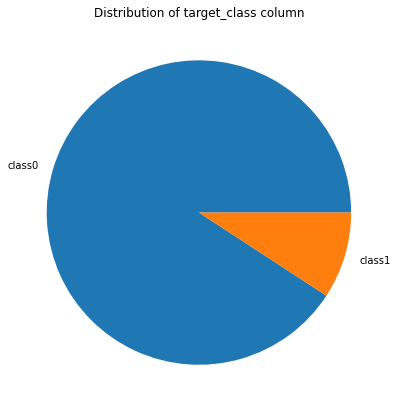

In [95]:
# Distribution of target_class column
labels = ['class0','class1']
fig = plt.figure(figsize =(10, 7))
plt.pie(df.target_class.value_counts(),labels= labels)
plt.title("Distribution of target_class column")
plt.show()

In [96]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 832.1 KB


## Data Preprocessing

In [97]:
# Check for missing values in variables
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [98]:
df.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


We will fill null (NaN) values by mean to avoid data loss

In [99]:
df['IP Kurtosis'] = df['IP Kurtosis'].fillna(df['IP Kurtosis'].mean())

In [100]:
df['DM-SNR Sd'] = df['DM-SNR Sd'].fillna(df['DM-SNR Sd'].mean())

In [101]:
df['DM-SNR Skewness'] = df['DM-SNR Skewness'].fillna(df['DM-SNR Skewness'].mean())

In [102]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

Now, We can see that there are no missing values in the dataset.

In [103]:
# View summary statistics in numerical variables
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.35,8.33,105.53,0.09
std,25.67,6.80,0.99,6.21,29.61,18.67,4.54,104.69,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.06,-0.19,1.91,14.76,5.80,38.13,0.00
50%,115.18,46.93,0.29,0.20,2.79,19.62,8.45,87.80,0.00
75%,127.11,50.98,0.48,0.93,5.41,26.47,10.73,135.77,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


On closer inspection, we can suspect that all the continuous variables may contain outliers.

Draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'DM-SNR Skewness')

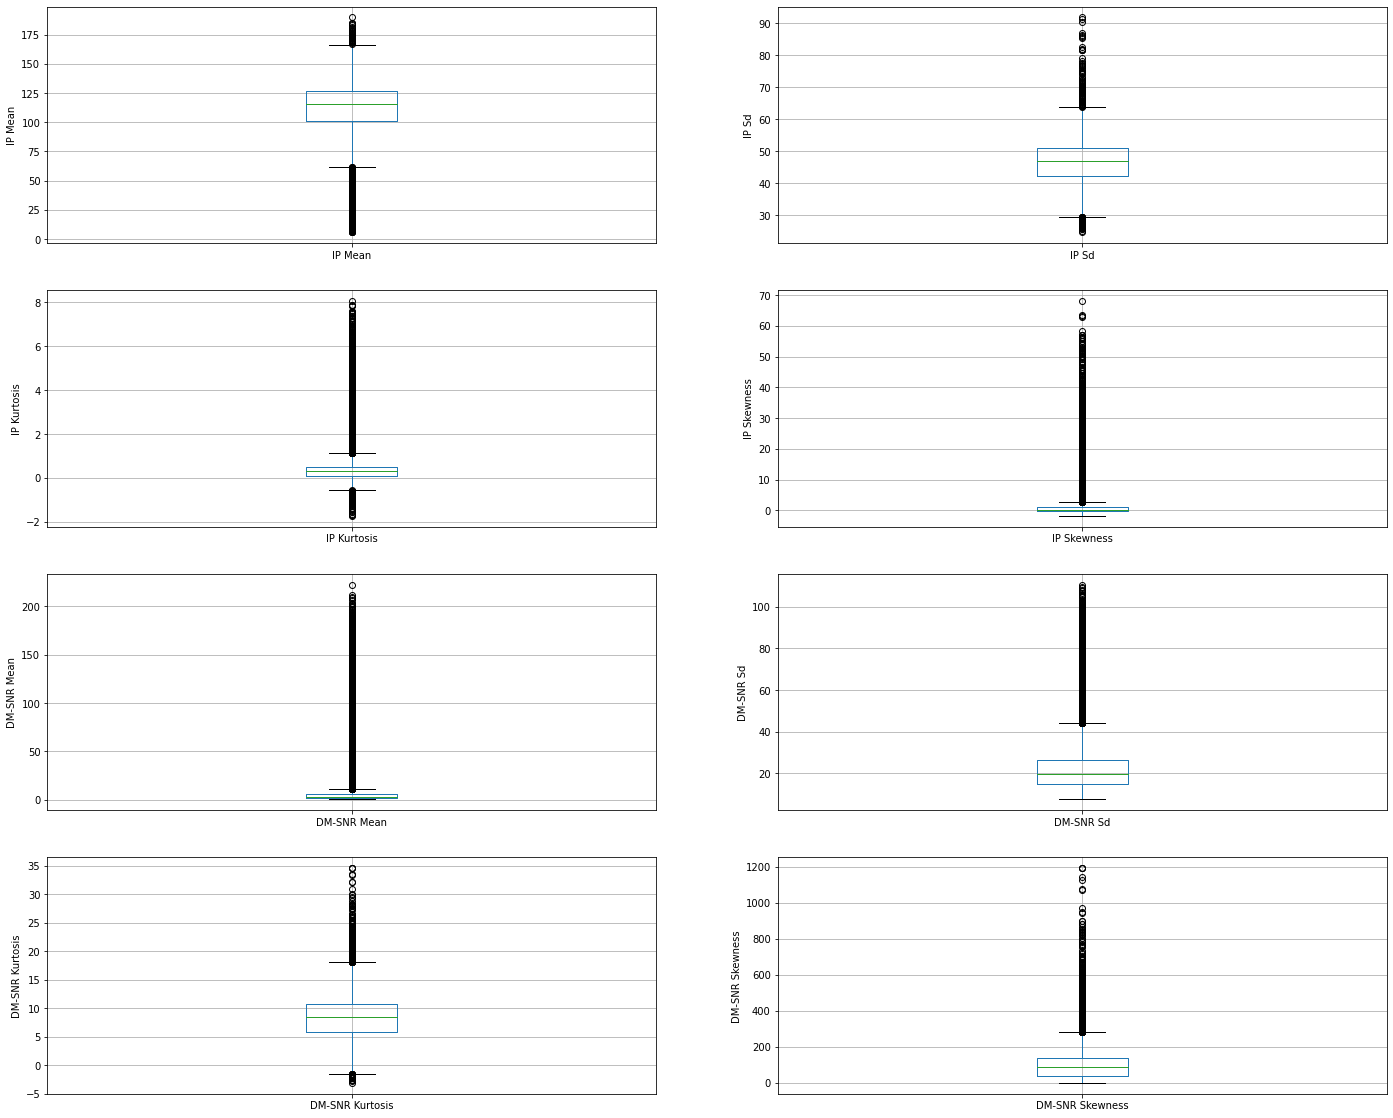

In [104]:
# Draw boxplots to visualize outliers
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of pulsar stars')

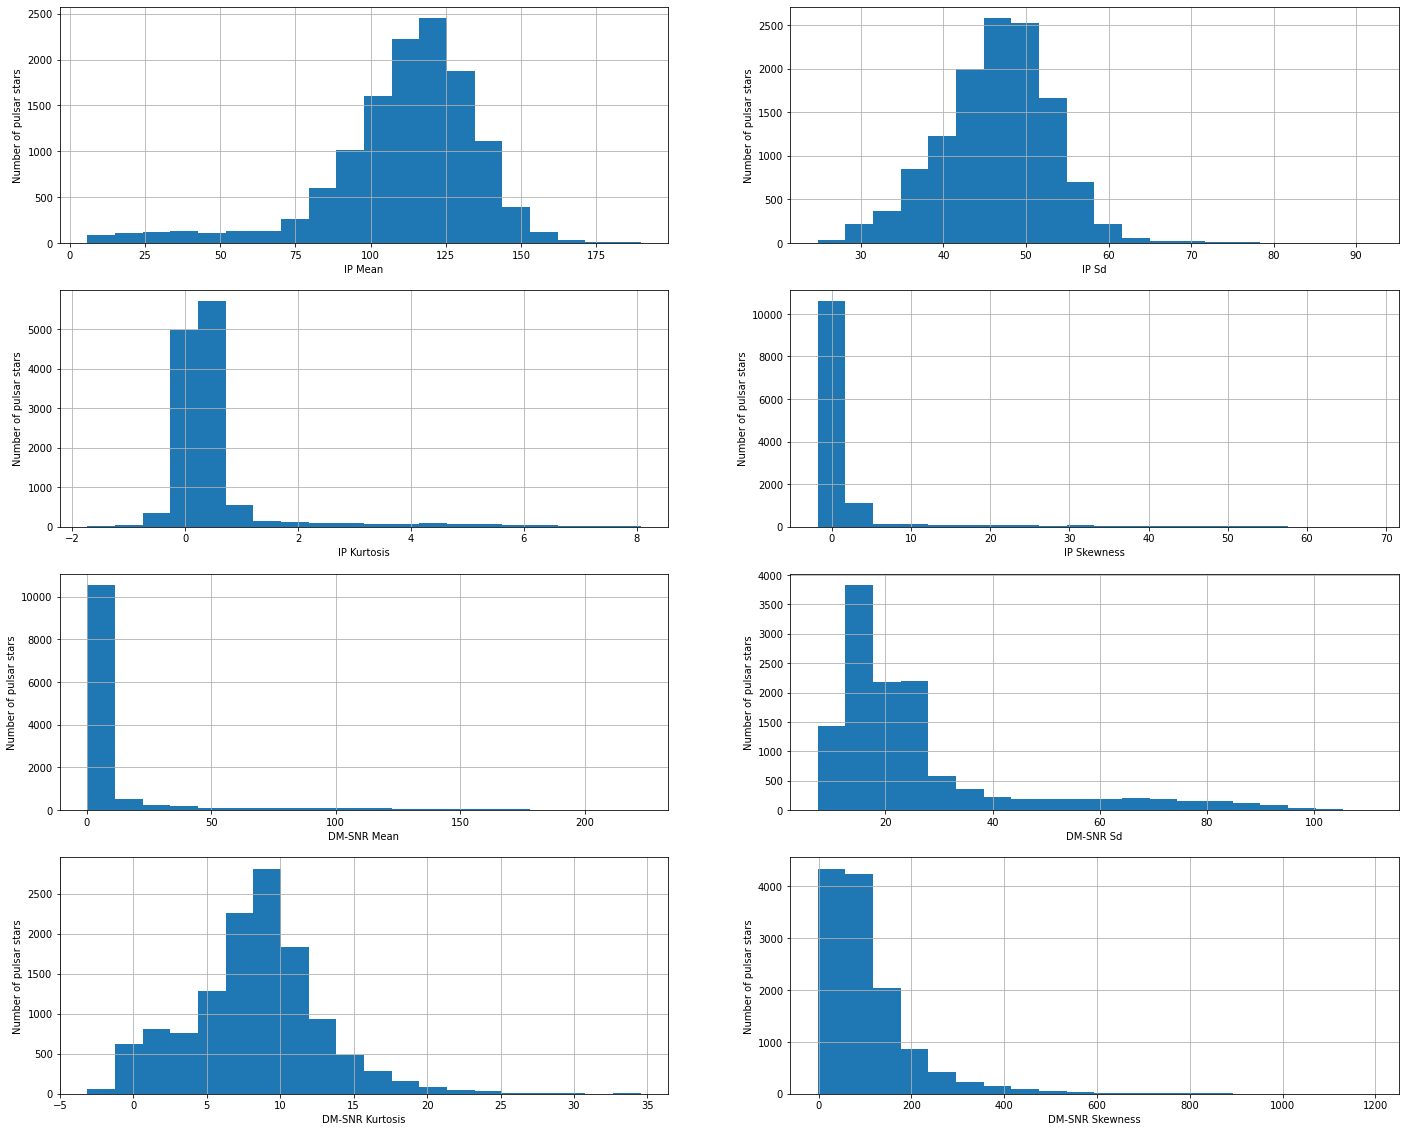

In [105]:
# Plot histogram to check distribution

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

In [106]:
# Declare feature vector and target variable
X = df.drop(['target_class'], axis=1)

y = df['target_class']

In [107]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [108]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((10022, 8), (2506, 8))

In [109]:
cols = X_train.columns
cols

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness'],
      dtype='object')

In [110]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [112]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04
mean,-6.504365e-17,-3.412091e-16,1.198624e-17,2.044142e-17,-1.972413e-17,1.099091e-16,5.834708e-17,-6.673302e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.068339e+00,-3.134139e+00,-2.223380e+00,-5.727451e-01,-4.214866e-01,-1.021415e+00,-2.455262e+00,-1.021468e+00
25%,-3.959611e-01,-6.097959e-01,-4.255271e-01,-3.173982e-01,-3.643063e-01,-6.246641e-01,-5.566043e-01,-6.425814e-01
50%,1.596222e-01,6.301244e-02,-1.901037e-01,-2.550993e-01,-3.344944e-01,-3.613014e-01,2.694159e-02,-1.714147e-01
75%,6.302598e-01,6.596210e-01,-1.547561e-03,-1.375948e-01,-2.455011e-01,2.249242e-02,5.321119e-01,2.928110e-01
max,3.042041e+00,6.582758e+00,7.607455e+00,1.056901e+01,6.601589e+00,4.469061e+00,5.789238e+00,1.036577e+01


## Model Training

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [114]:
# Run SVM with default hyperparameters
# C = 1.0
# Kernel = rbf
# Gamma = auto
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9796


### Radial Basis Formula Kernel

Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation –

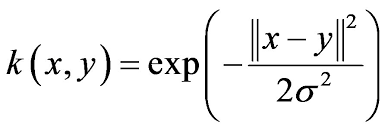


Run SVM with kernel=`rbf`

In [115]:
# Run SVM with RBF kernel
svc = SVC(kernel= 'rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel: 0.9796


In [116]:
# Classification Report
print("Classification Report using RBF kernel \n \n")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Classification Report using RBF kernel 
 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2279
           1       0.96      0.81      0.88       227

    accuracy                           0.98      2506
   macro avg       0.97      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [118]:
# Compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC (RBF Kernel) : {:.4f}'.format(ROC_AUC))

ROC AUC (RBF Kernel) : 0.9015


### Linear Kernal 

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time.

In [119]:
# Run SVM with linear kernel 
linear_svc = SVC(kernel = 'linear')
linear_svc.fit(X_train,y_train)
y_pred=linear_svc.predict(X_test)
print('Model accuracy score with linear kernel: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel: 0.9777


In [120]:
# Classification Report
print("Classification Report using Linear kernel \n \n")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Classification Report using Linear kernel 
 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2279
           1       0.96      0.78      0.86       227

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [121]:
# Compute ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC (Linear Kernel) : {:.4f}'.format(ROC_AUC))

ROC AUC (Linear Kernel) : 0.8905


### Polynomial Kernel 

Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.

In [122]:
# Run SVM with polynomial kernel
poly_svc = SVC(kernel = 'poly')
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Model accuracy score with polynomial kernel: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel: 0.9757


In [123]:
# Classification Report
print("Classification Report using Polynomial kernel \n \n")
print(classification_report(y_test, y_pred))

Classification Report using Polynomial kernel 
 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2279
           1       0.98      0.75      0.85       227

    accuracy                           0.98      2506
   macro avg       0.98      0.87      0.92      2506
weighted avg       0.98      0.98      0.97      2506



In [124]:
# Compute ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC (Polynomial Kernel) : {:.4f}'.format(ROC_AUC))

ROC AUC (Polynomial Kernel) : 0.8736


### Sigmoid Kernel

Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. Sigmoid kernel is given by the following equation –

`sigmoid kernel : k (x, y) = tanh(αxTy + c)`

In [125]:
# Run SVM with sigmoid kernel
sigmoid_svc = SVC(kernel = 'sigmoid')
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)
print('Model accuracy score with sigmoid kernel: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel: 0.8747


In [126]:
# Classification Report
print("Classification Report using Sigmoid kernel \n \n")
print(classification_report(y_test, y_pred))

Classification Report using Sigmoid kernel 
 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2279
           1       0.30      0.30      0.30       227

    accuracy                           0.87      2506
   macro avg       0.62      0.62      0.62      2506
weighted avg       0.87      0.87      0.87      2506



In [127]:
# Compute ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC (Sigmoid Kernel) : {:.4f}'.format(ROC_AUC))

ROC AUC (Sigmoid Kernel) : 0.6158


### Precomputed Kernel

Can't compute as input is not a square matrix

In [ ]:
#precomputed kernel ==> Can't compute input is not sqaure matrix

## Parameters Optimization Using GridSearchCV

In [38]:
# Using grid search cv
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# import SVC classifier
from sklearn.svm import SVC
# instantiate classifier with default hyperparameters
svc=SVC() 
# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [39]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9783


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.1)


## Comments


*   We get maximum accuracy with '`rbf`' kernel with C=`10.0`. and the accuracy is `0.9783`. Based on the above analysis, we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.
*   But, this is not true. Here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making. One such metric to analyze the model performance in imbalanced classes problem is `Confusion matrix`
*   `ROC_AUC` is a single number summary of classifier performance. The higher the value, the better the classifier. `ROC_AUC` of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.
* Our original model test accuracy is `0.9783` while GridSearch CV score on test-set is `0.9783`.
* `ROC_AUC` of our model using `'rbf'` kernel is very close to 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.



----------------------------------------------------------------------------------